In [57]:
pip install pandas scikit-learn matplotlib                                                    

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [120]:
df = pd.read_csv('Glass Identification.csv')

df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv"
glass_df = pd.read_csv(url)

glass_df

In [60]:
#Cheking first 5 rows of the dataset
df.head()


,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [61]:
#Cheking last 5 rows of the dataset
df.tail()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [62]:
df.shape

(214, 11)

# Exploratory Data Analysis (EDA)

In [63]:
print("The dimenssion of the Dataset :",df.shape)
print(f"\nThe Column header in the dataset: ,{df.columns}")

The dimenssion of the Dataset : (214, 11)

The Column header in the dataset: ,Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')


In [64]:
df.dtypes

Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [65]:
#Checking the null values 
df.isnull().sum()

Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<Axes: >

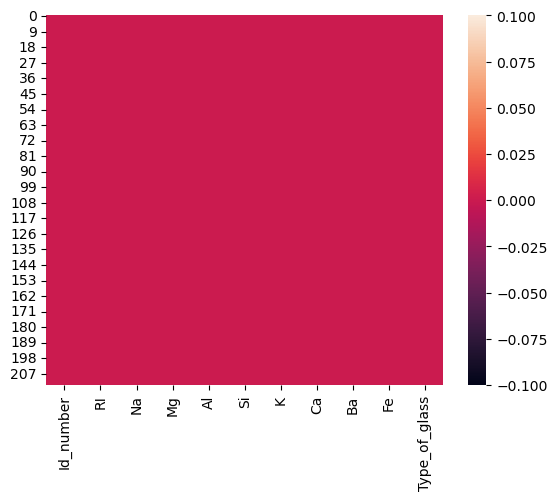

In [67]:
sns.heatmap(df.isnull())

In [68]:
df.nunique().to_frame("No. unique values")   #Not makes any sense while we working with continious data

,No. unique values
Id_number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [69]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Id_number
1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: count, Length: 214, dtype: int64


RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


K
0.00    30
0.

In [70]:
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [71]:
print("Total Duplicate Rows are :",df.duplicated().sum())

Total Duplicate Rows are : 0


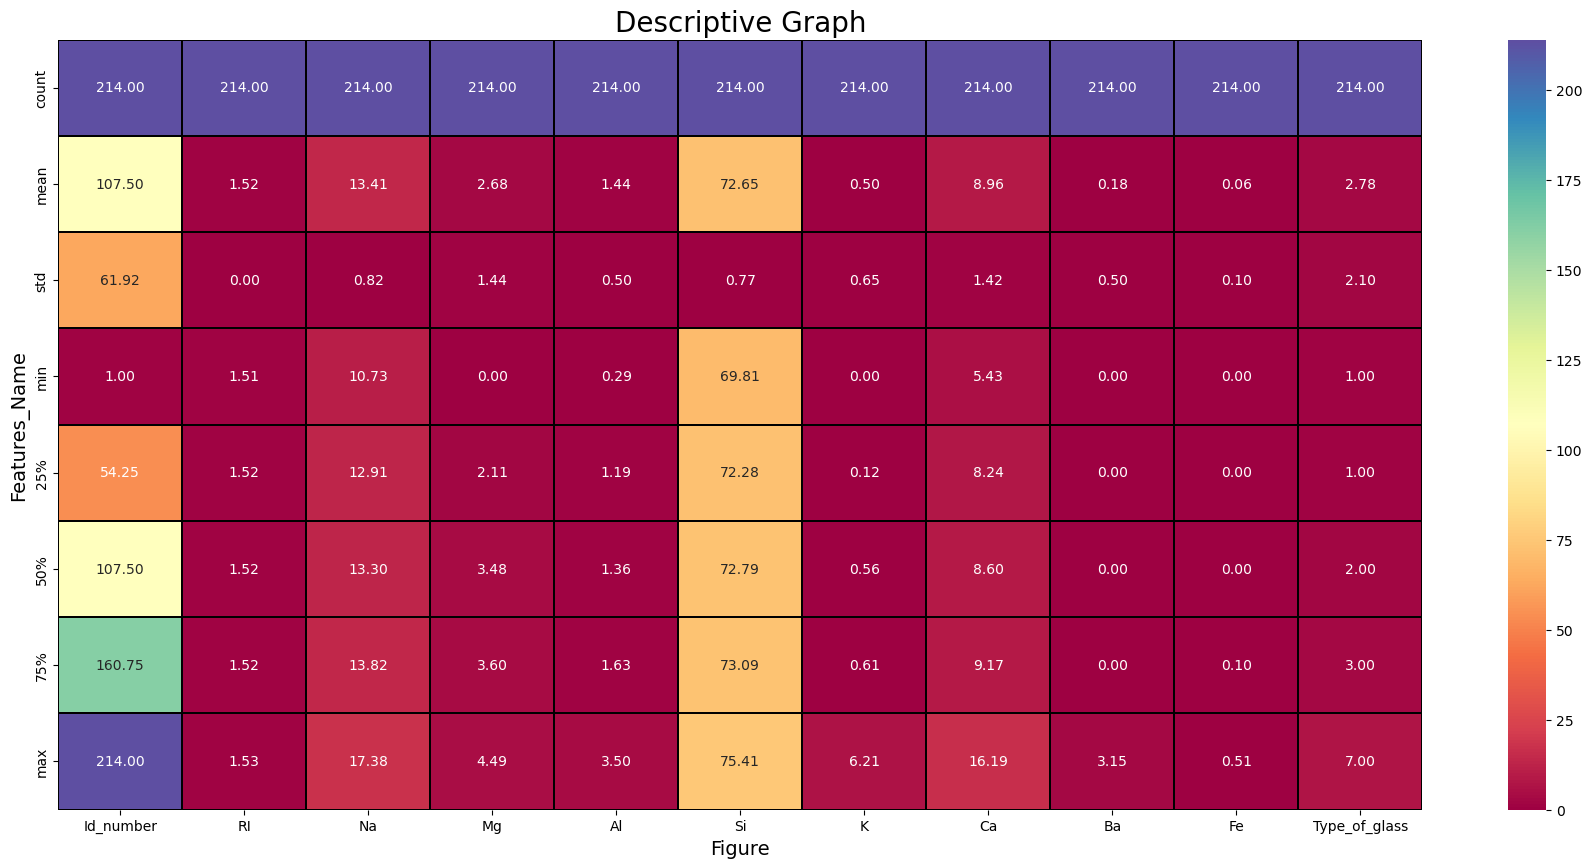

In [73]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [74]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 []

Number Data Type Columns are: 
 ['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']


In [75]:
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [81]:
Numerical_cols=['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']

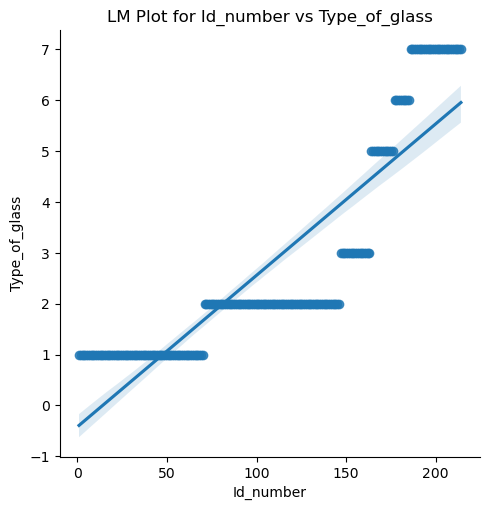

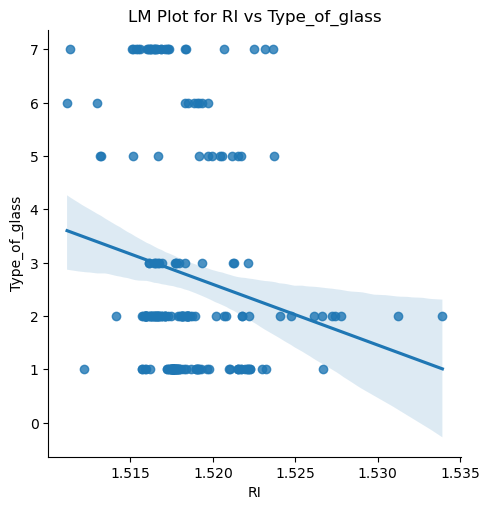

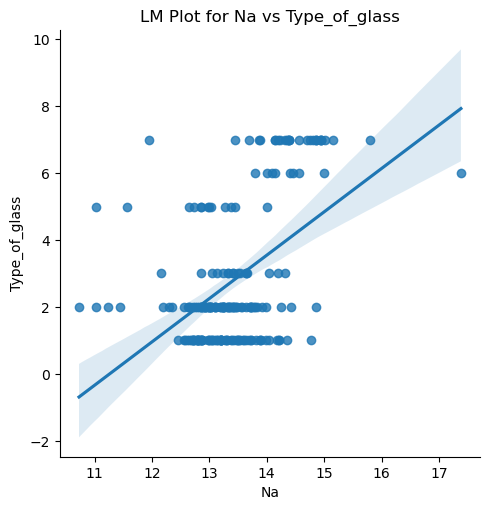

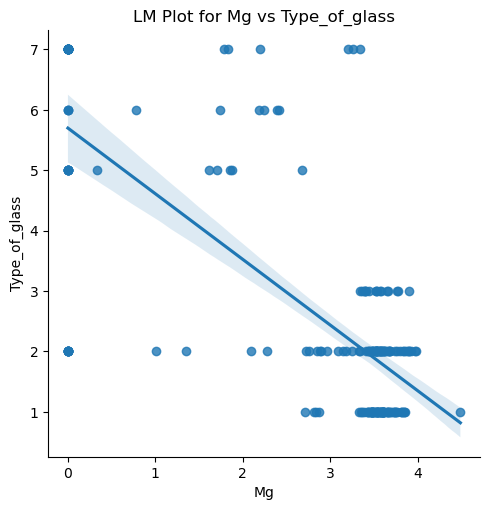

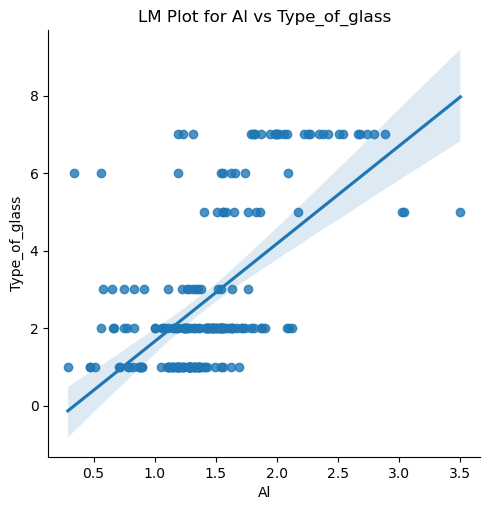

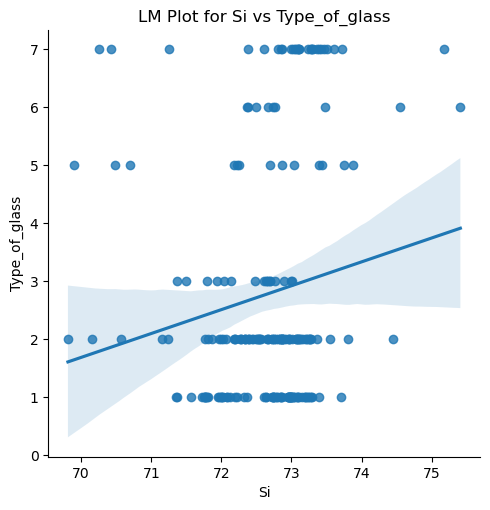

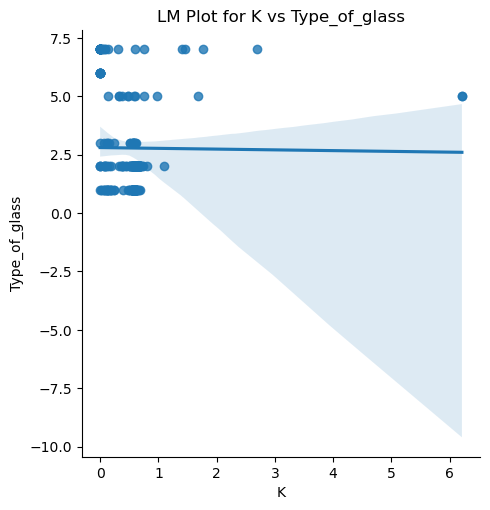

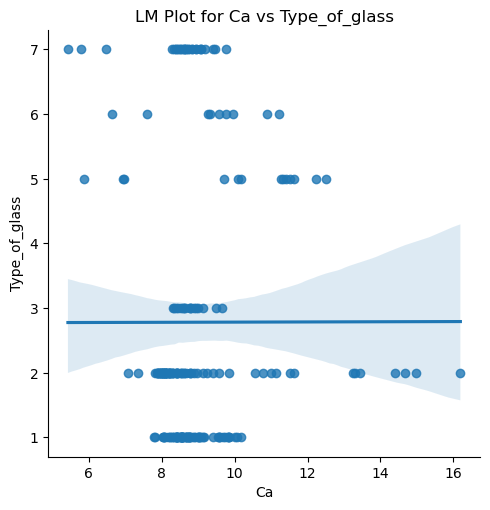

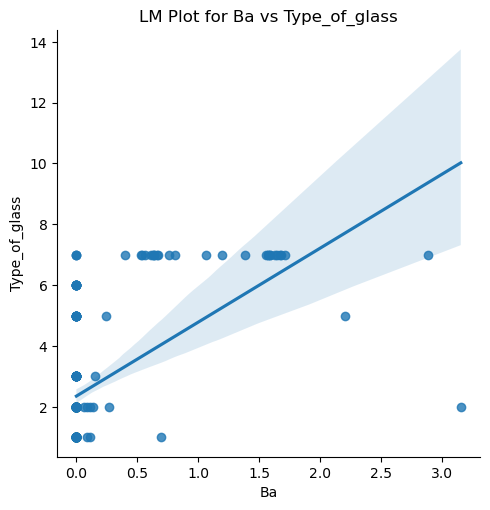

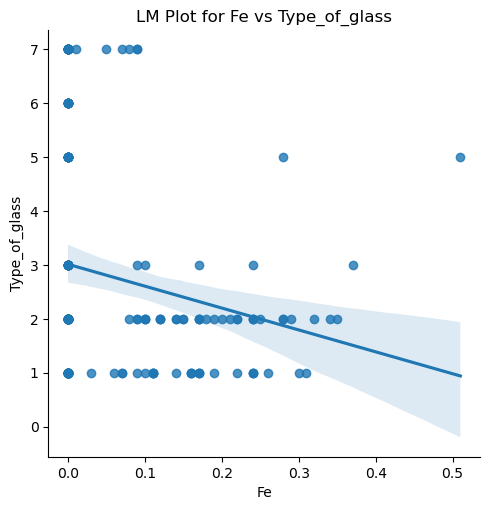

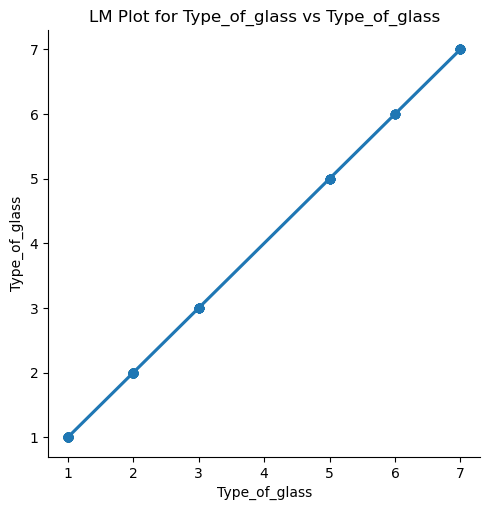

In [82]:
def plot_lmplot_for_numerical_cols(df, Numerical_cols, target_column='Type_of_glass'):
    for col in Numerical_cols:
        sns.lmplot(x=col, y=target_column, data=df, palette='colorblind')
        plt.title(f'LM Plot for {col} vs {target_column}')
        plt.show()
        

plot_lmplot_for_numerical_cols(df, Numerical_cols)        

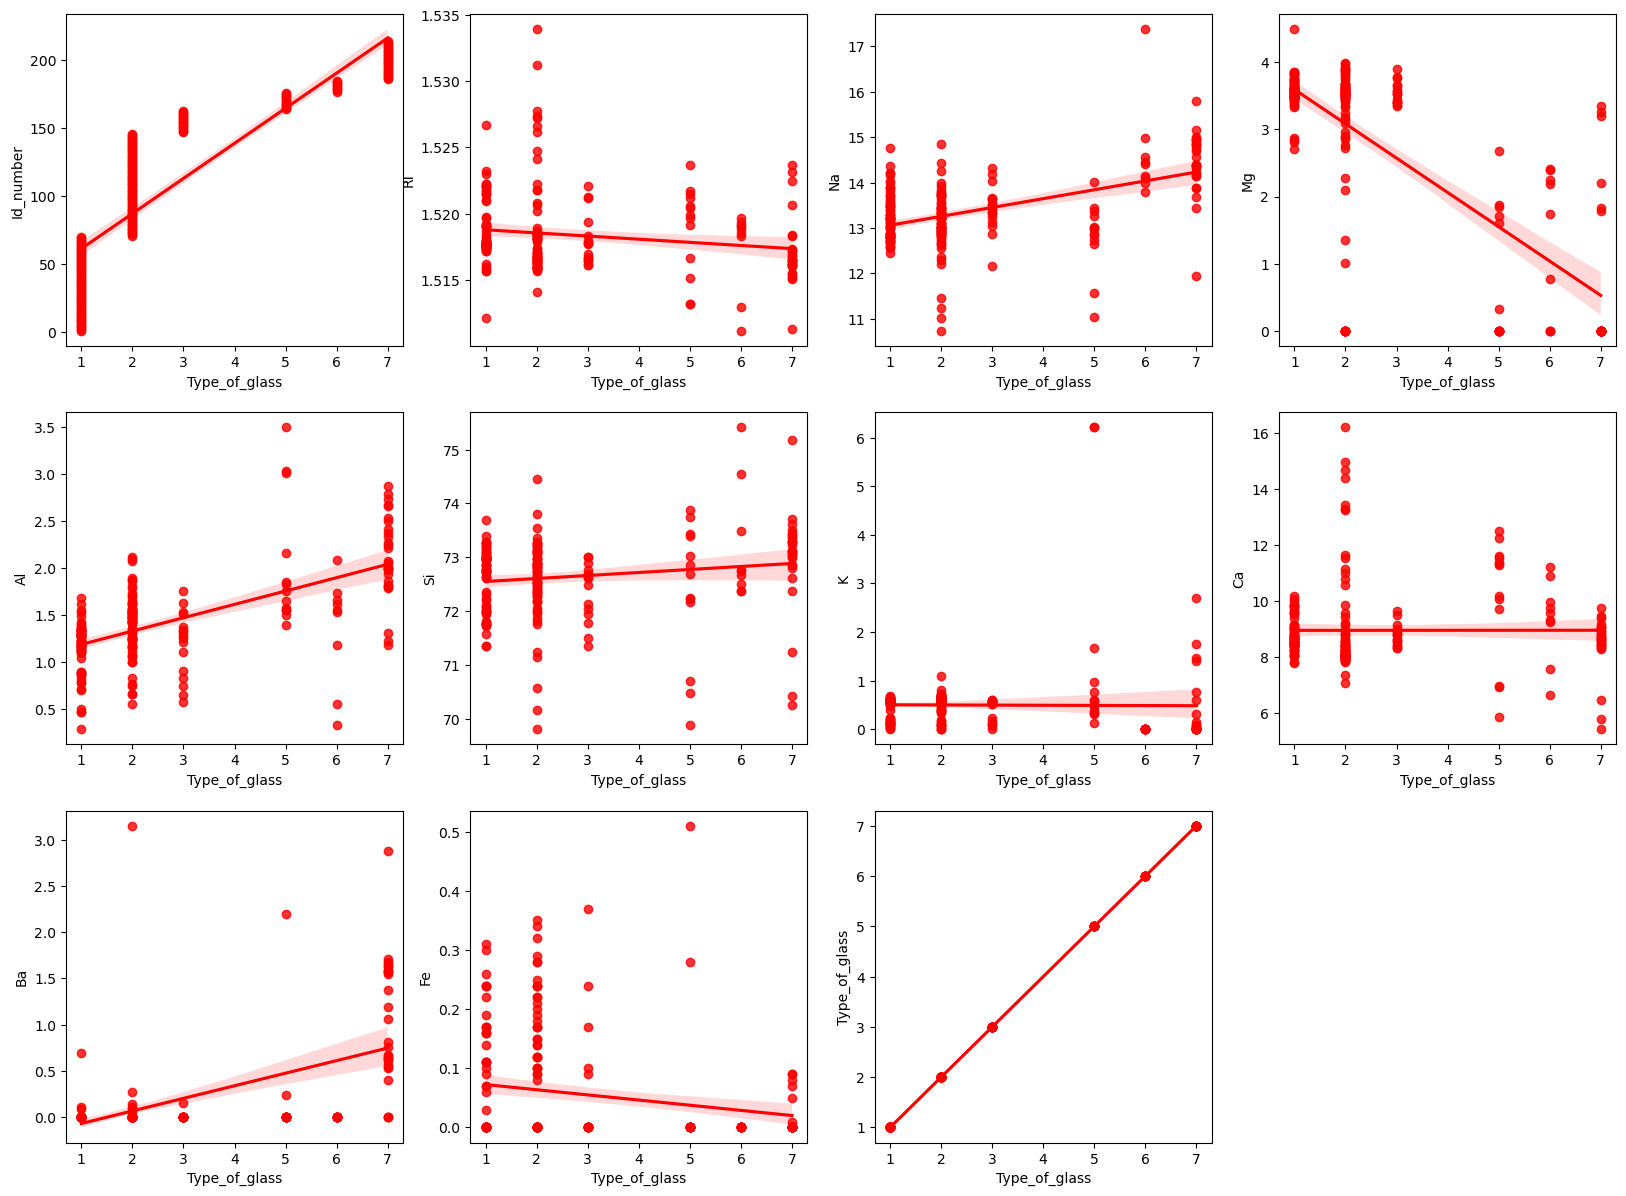

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))
p = 1

for i in df.columns:  # Iterate over column names
    if p <= 17:
        plt.subplot(5, 4, p)
        sns.regplot(x='Type_of_glass', y=i, data=df, color='r')  # Use column names
        plt.xlabel("Type_of_glass")  # Corrected 'xlable' to 'xlabel'
        plt.ylabel(i)
    p += 1

plt.show()


In [84]:
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [85]:
Columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

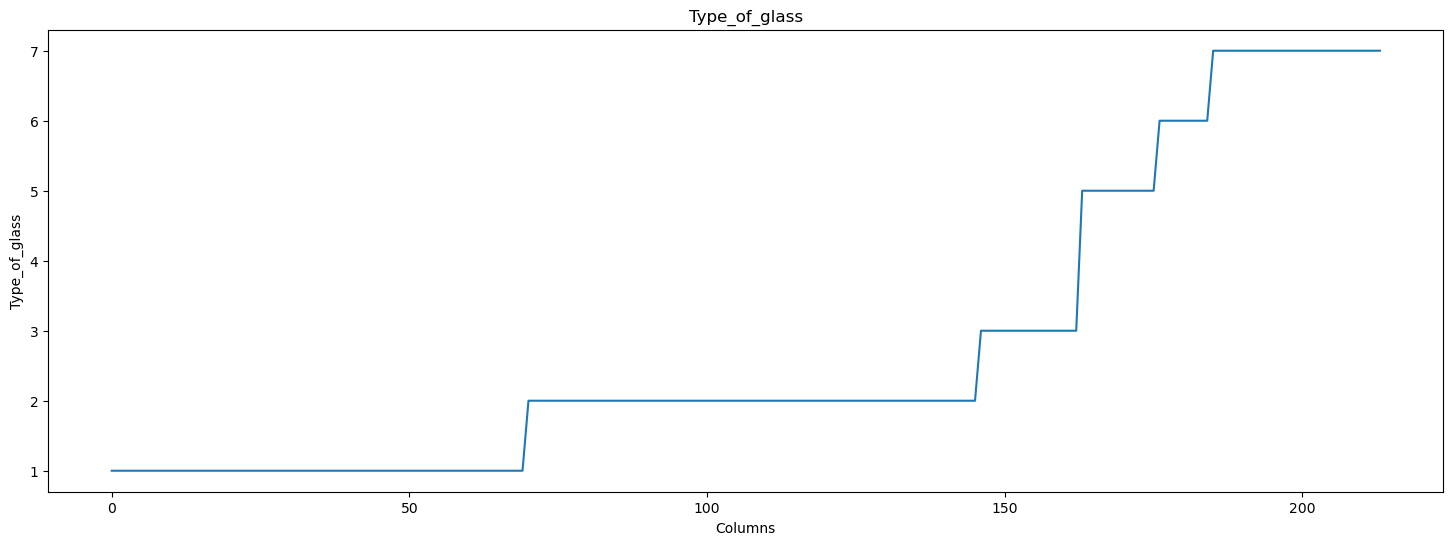

In [87]:
plt.figure(figsize = (18,6))
plt.plot(df.Type_of_glass, label='Columns')
plt.ylabel("Type_of_glass")
plt.xlabel("Columns")
plt.title("Type_of_glass")
plt.show()

In [89]:
df.drop(["Id_number"],axis=1, inplace=True)

(0.0, 10.0)

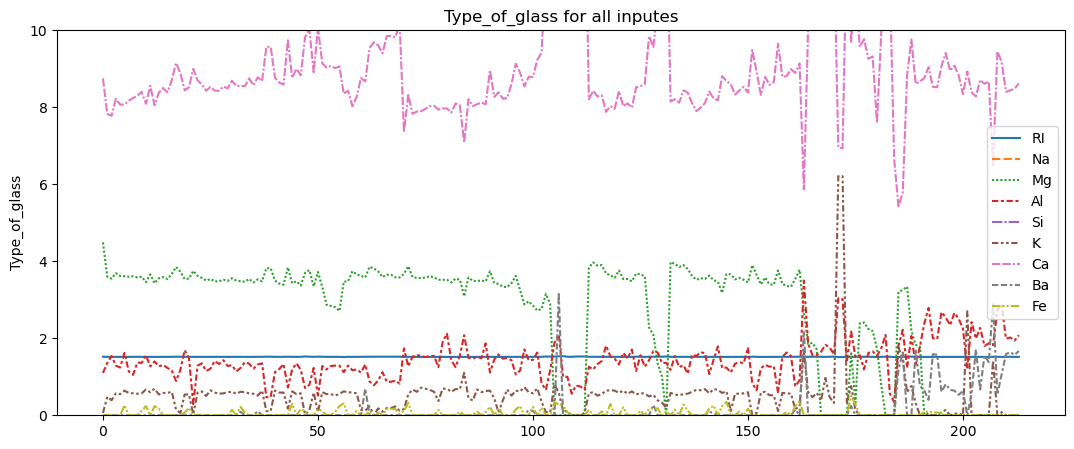

In [90]:
plt.figure(figsize=(13,5))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel("Type_of_glass")
plt.title("Type_of_glass for all inputes")

plt.ylim(0, 10)

In [91]:
numerical_cols=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']

plt.figure(figsize=(20, 15), facecolor='white')

# Calculate the number of rows and columns needed for the subplots
num_rows = len(numerical_cols) // 8 + (len(numerical_cols) % 8 > 0)
num_cols = min(len(numerical_cols), 8)

for plot_number, column in enumerate(numerical_cols, start=1):
    ax = plt.subplot(num_rows, num_cols, plot_number)
    sns.boxplot(x=df[column], ax=ax)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

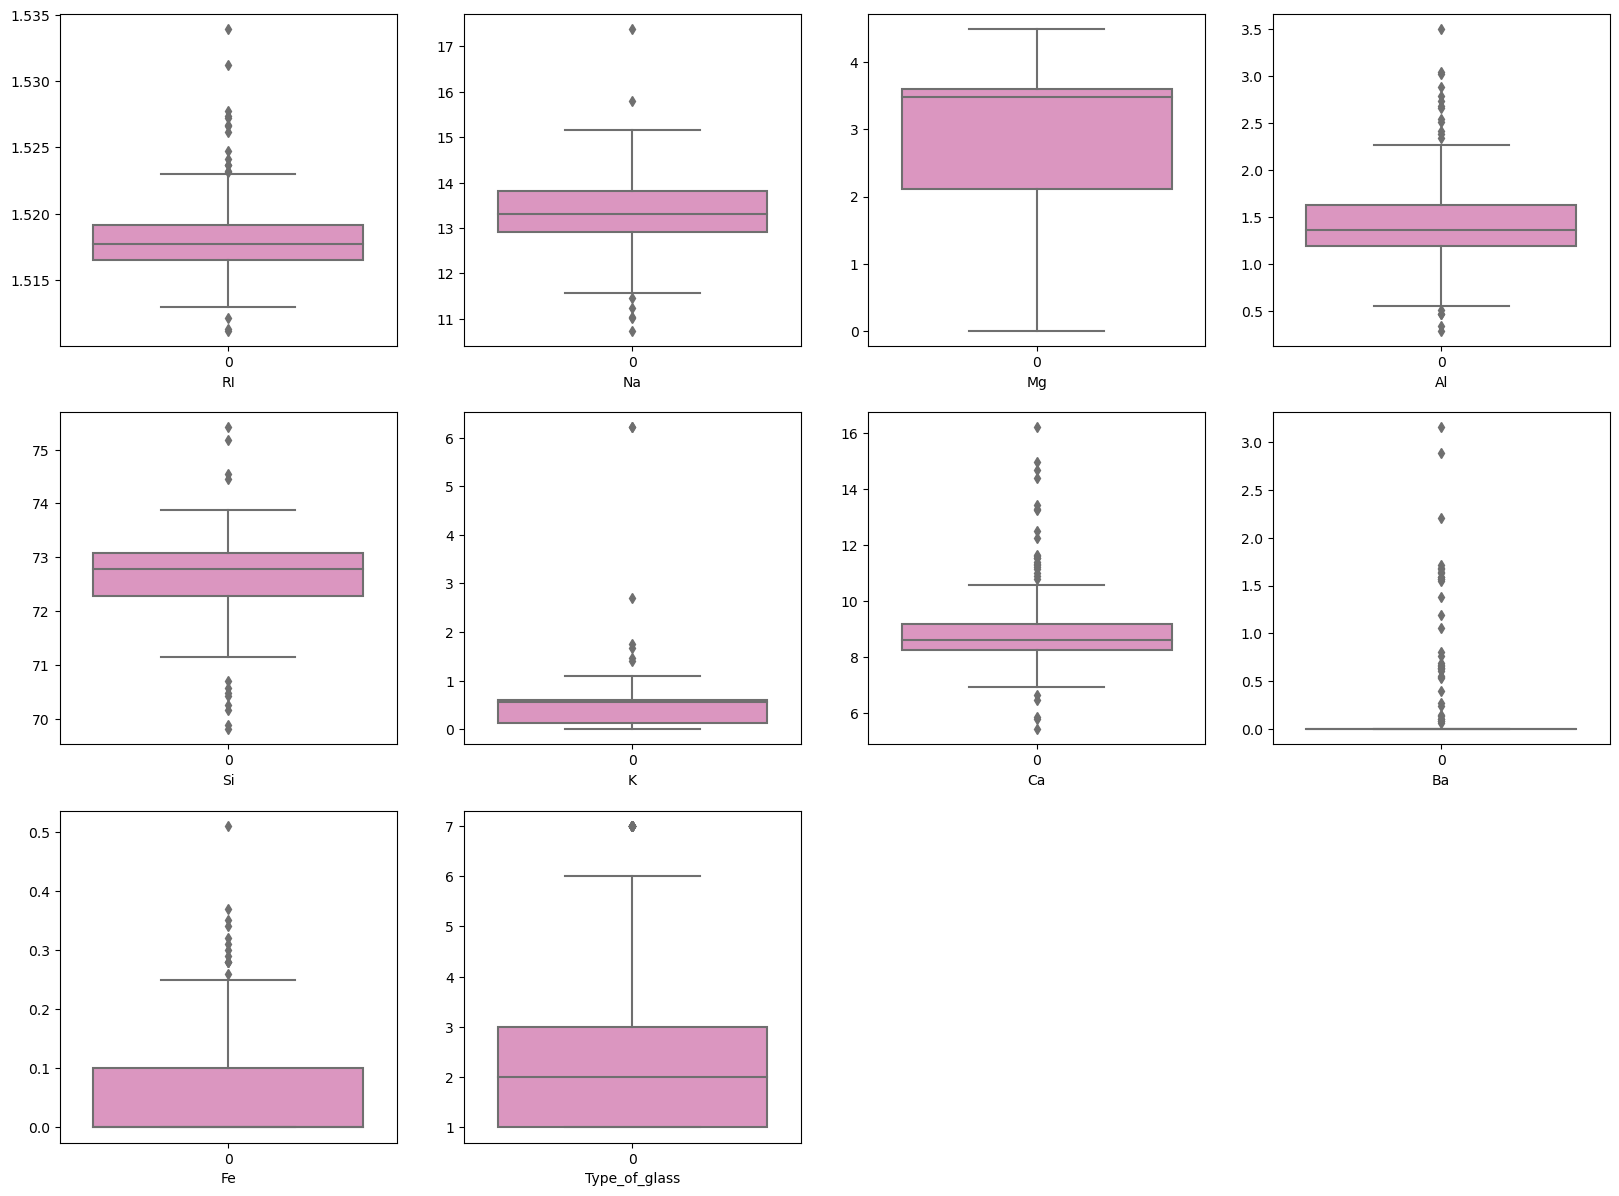

In [93]:
plt.figure(figsize=(20,25))
p=1

for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = "Set2_r")
        plt.xlabel(i)
        
    p+=1    
    
plt.show()    

In [ ]:
#Formula of z score -(observed value - mean)/standerd deviation

In [94]:
from scipy.stats import zscore
out_features=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']]
z=np.abs(zscore(out_features))

z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [95]:
#Threshold=3
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [100]:
z.iloc[213,3]

1.2750275278344632

In [ ]:
#z= (datapoint/observed value - mean of the sample)/standerd deviation of the sample 


In [101]:
df1 = df[(z<3).all(axis=1)]

df1.shape

(194, 10)

In [103]:
print("Old Data Frame- ",df.shape[0])
print("New Data Frame- ",df1.shape[0])


Old Data Frame-  214
New Data Frame-  194


In [104]:
print("Data Loss Percentage- ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage-  9.345794392523365


In [102]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [105]:
Q1 = out_features.quantile(0.25)
Q3 = out_features.quantile(0.75)
IQR = Q3 - Q1

# Align the index of 'df' and 'out_features' before performing the comparison
df2 = df[~((df[out_features.columns] < (Q1 - 1.5 * IQR)) | (df[out_features.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [106]:
df2.shape

(136, 10)

In [107]:
print("Data Loss Percentage After removiing outlaiers with IQR methode- ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removiing outlaiers with IQR methode-  36.44859813084112


In [108]:
df=df1

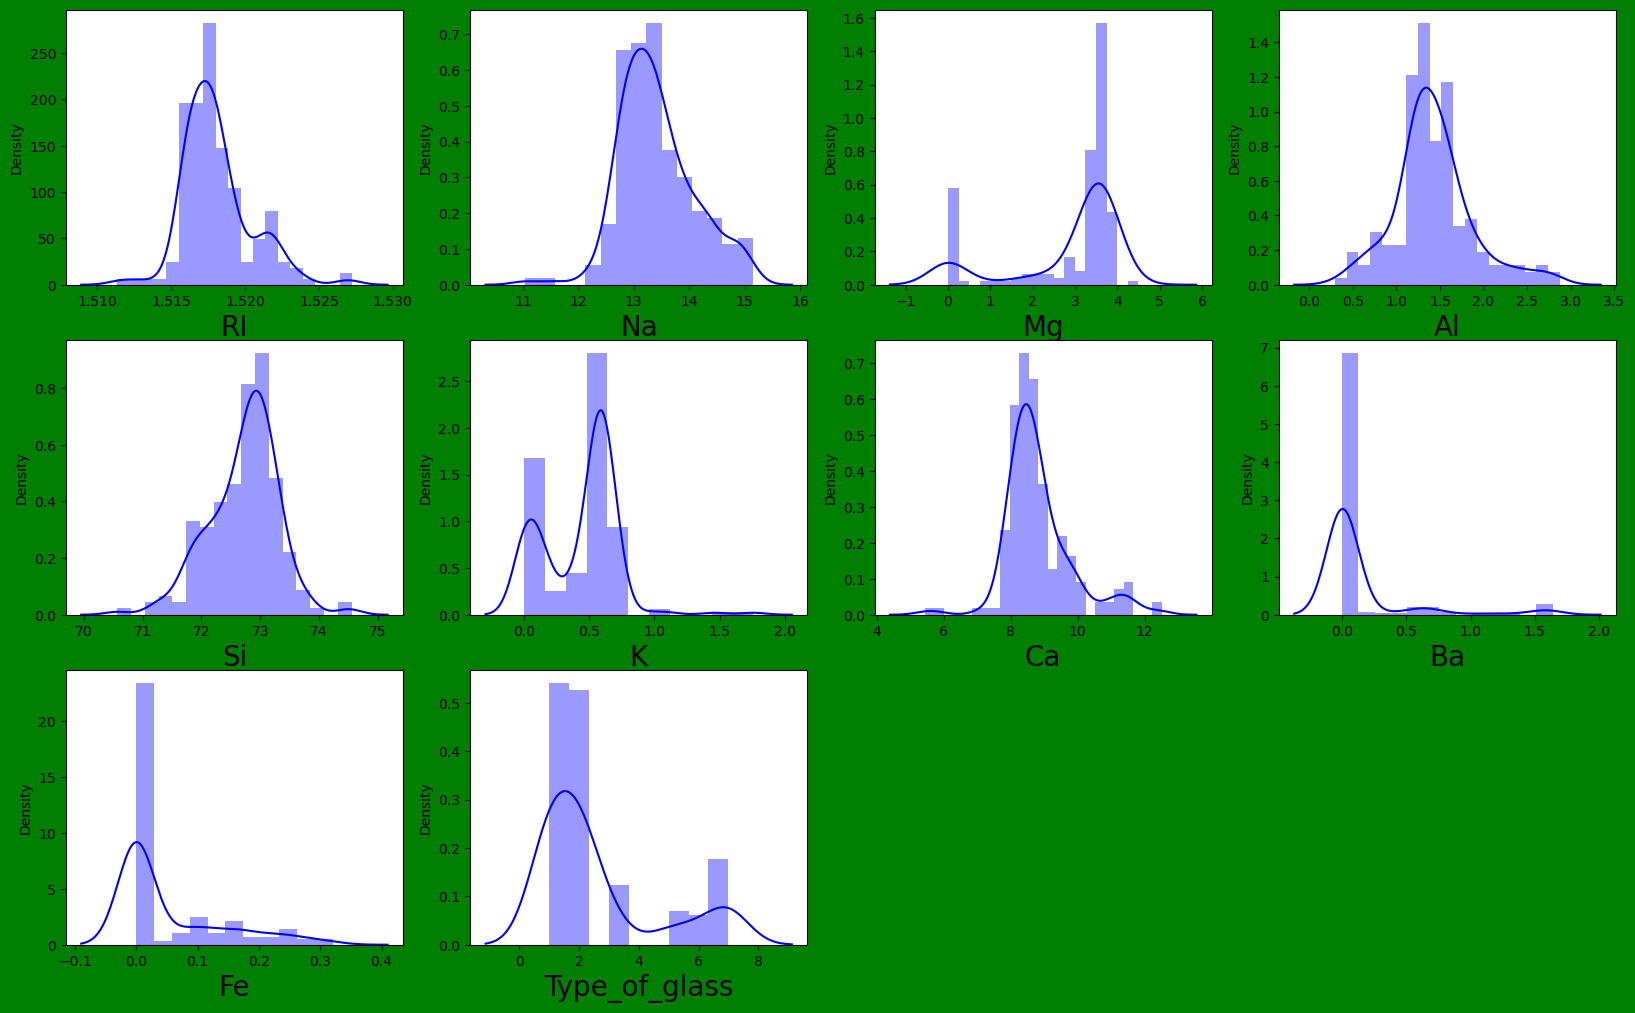

In [109]:
plt.figure(figsize=(20,25),facecolor='green')

plotnumber =1 

for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1    
    
plt.show()    

In [110]:
df.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type_of_glass    1.284007
dtype: float64

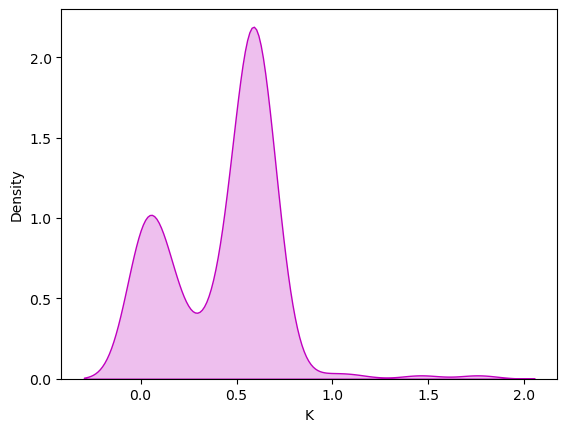

In [111]:
sns.distplot(df['K'],color="m",kde_kws = {"shade":True},hist = False)

plt.show()

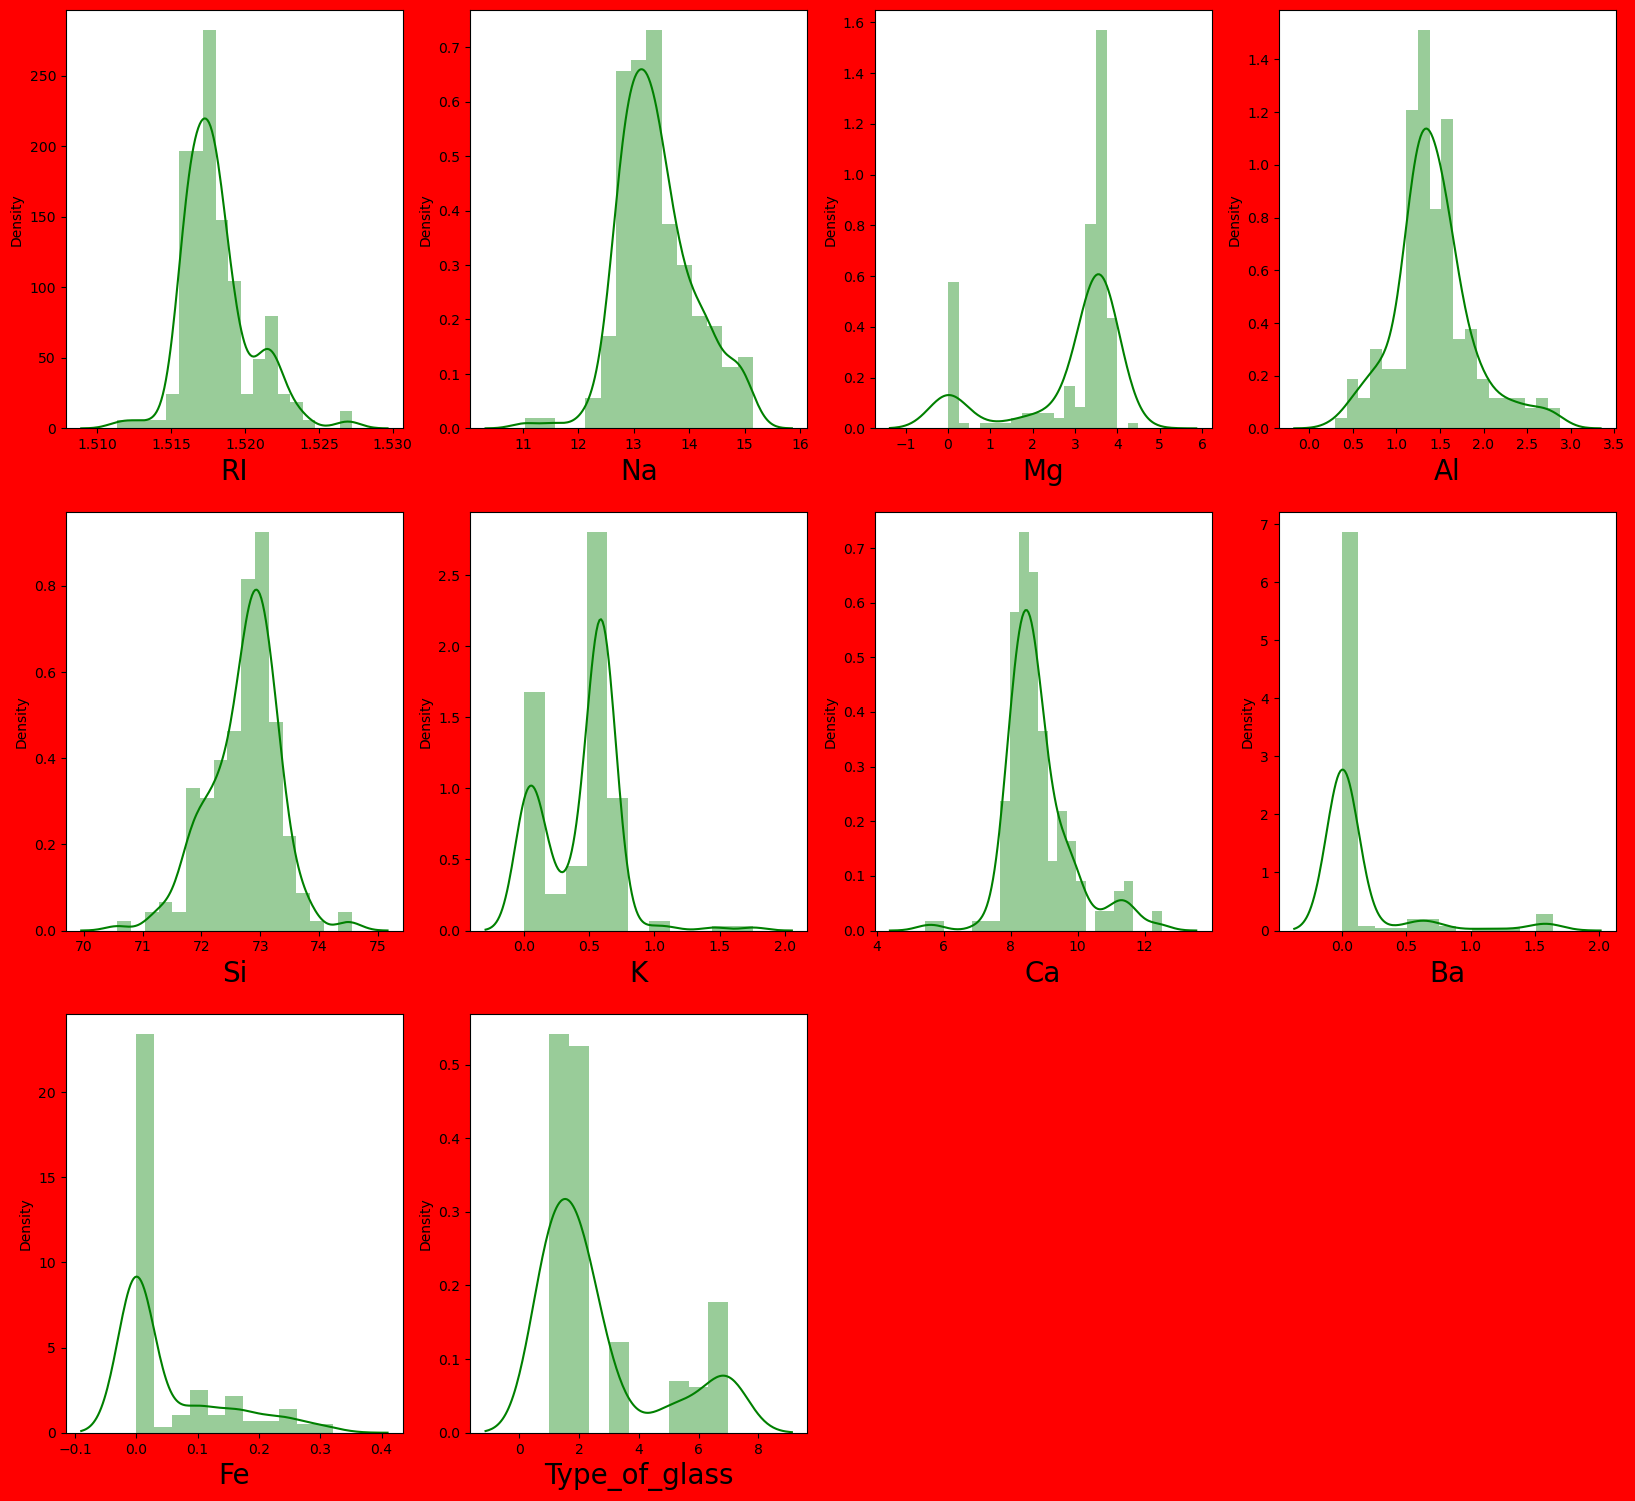

In [112]:
#Let us visualize again
plt.figure(figsize=(20,25),facecolor='red')

plotnumber =1 

for column in df:
    if plotnumber <=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1    
    
plt.show()    

In [113]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
RI,1.000000,0.050760,0.048147,-0.522197,-0.609011,-0.368238,0.690650,-0.193013,-0.020046,-0.167355
Na,0.050760,1.000000,-0.487729,0.253127,-0.234718,-0.612183,0.019987,0.532000,-0.209838,0.533025
Mg,0.048147,-0.487729,1.000000,-0.593457,-0.377464,0.482622,-0.455582,-0.586581,0.134065,-0.810321
Al,-0.522197,0.253127,-0.593457,1.000000,0.335262,0.005827,-0.213304,0.532061,-0.117764,0.660262
Si,-0.609011,-0.234718,-0.377464,0.335262,1.000000,0.072579,-0.165712,0.155017,0.023279,0.262152
K,-0.368238,-0.612183,0.482622,0.005827,0.072579,1.000000,-0.500579,-0.253790,0.099394,-0.383499
Ca,0.690650,0.019987,-0.455582,-0.213304,-0.165712,-0.500579,1.000000,-0.167843,-0.011635,0.154762
Ba,-0.193013,0.532000,-0.586581,0.532061,0.155017,-0.253790,-0.167843,1.000000,-0.119955,0.682768
Fe,-0.020046,-0.209838,0.134065,-0.117764,0.023279,0.099394,-0.011635,-0.119955,1.000000,-0.202028
Type_of_glass,-0.167355,0.533025,-0.810321,0.660262,0.262152,-0.383499,0.154762,0.682768,-0.202028,1.000000


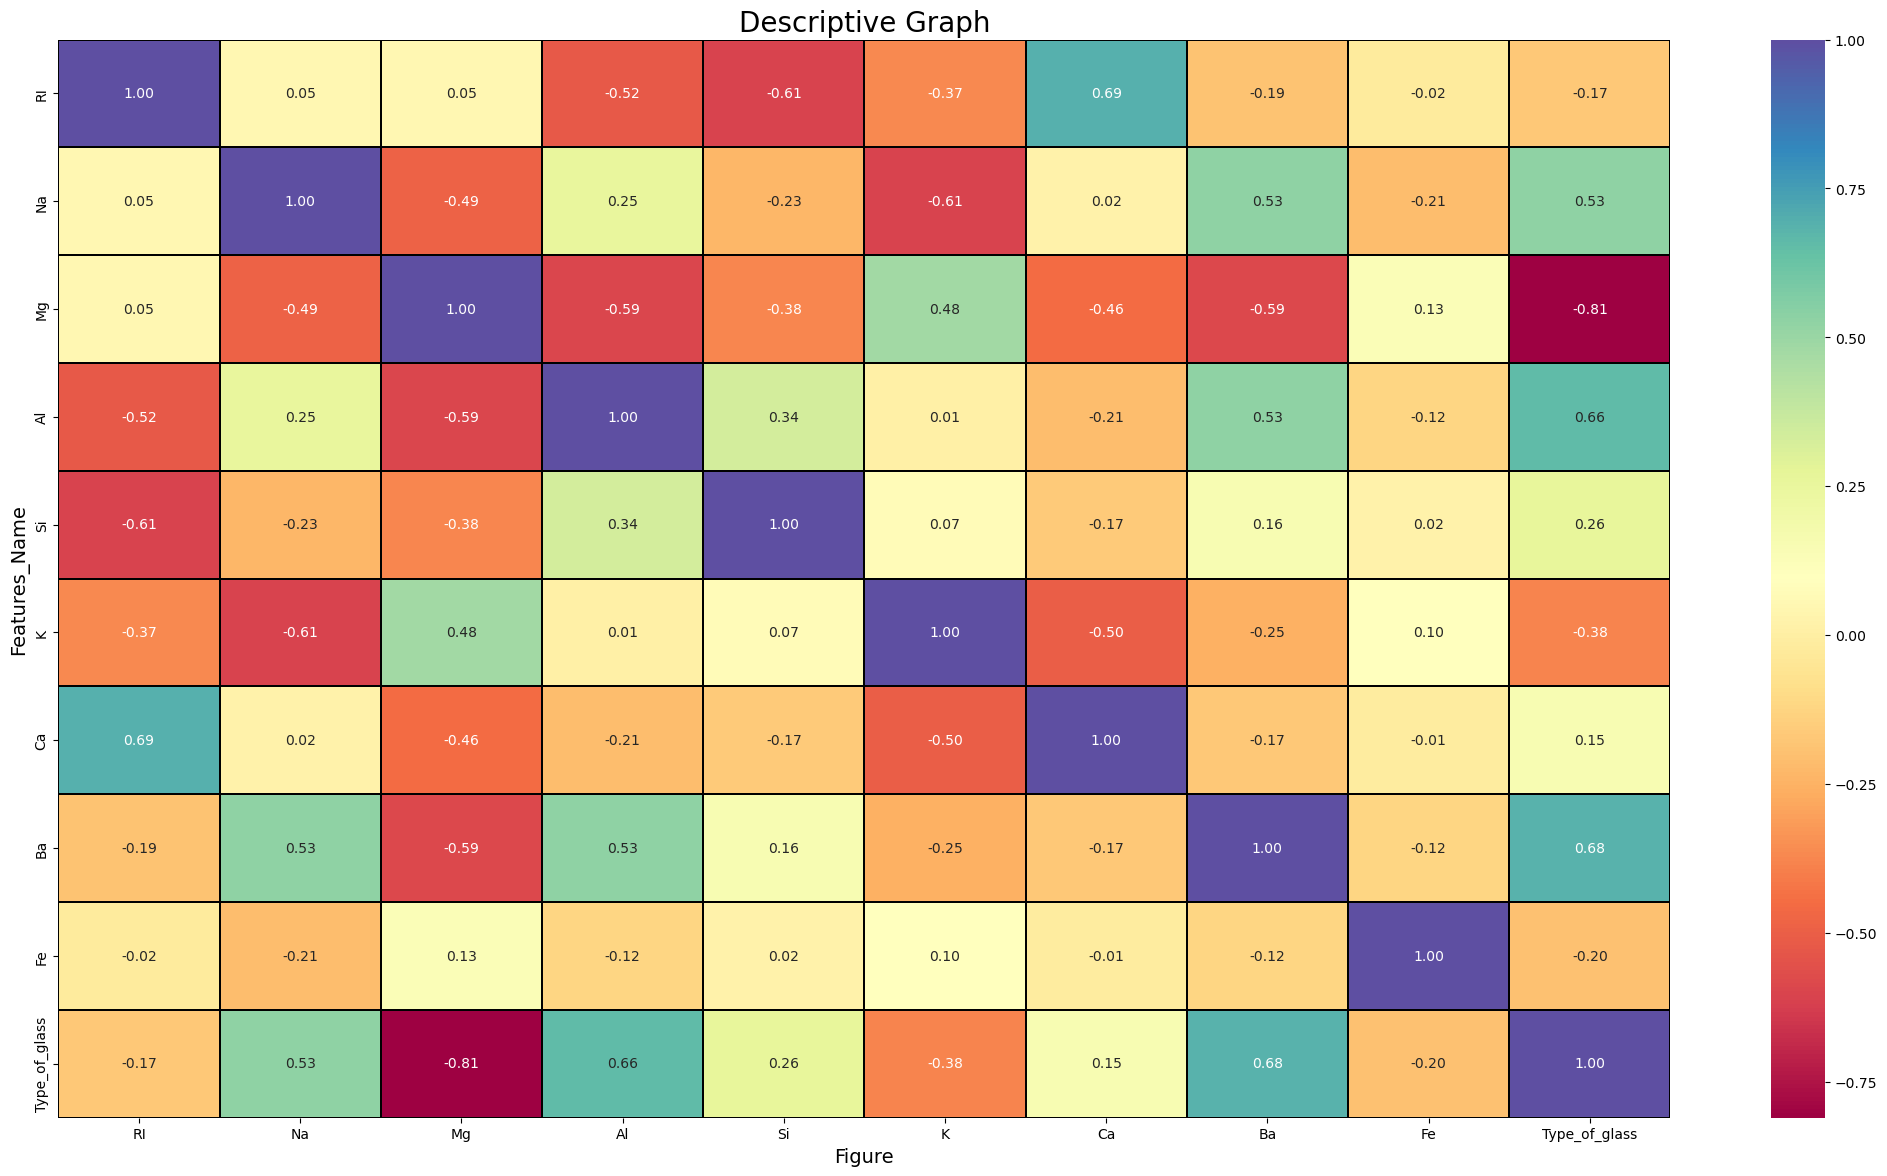

In [114]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [116]:
df.corr().K.sort_values()

Na              -0.612183
Ca              -0.500579
Type_of_glass   -0.383499
RI              -0.368238
Ba              -0.253790
Al               0.005827
Si               0.072579
Fe               0.099394
Mg               0.482622
K                1.000000
Name: K, dtype: float64

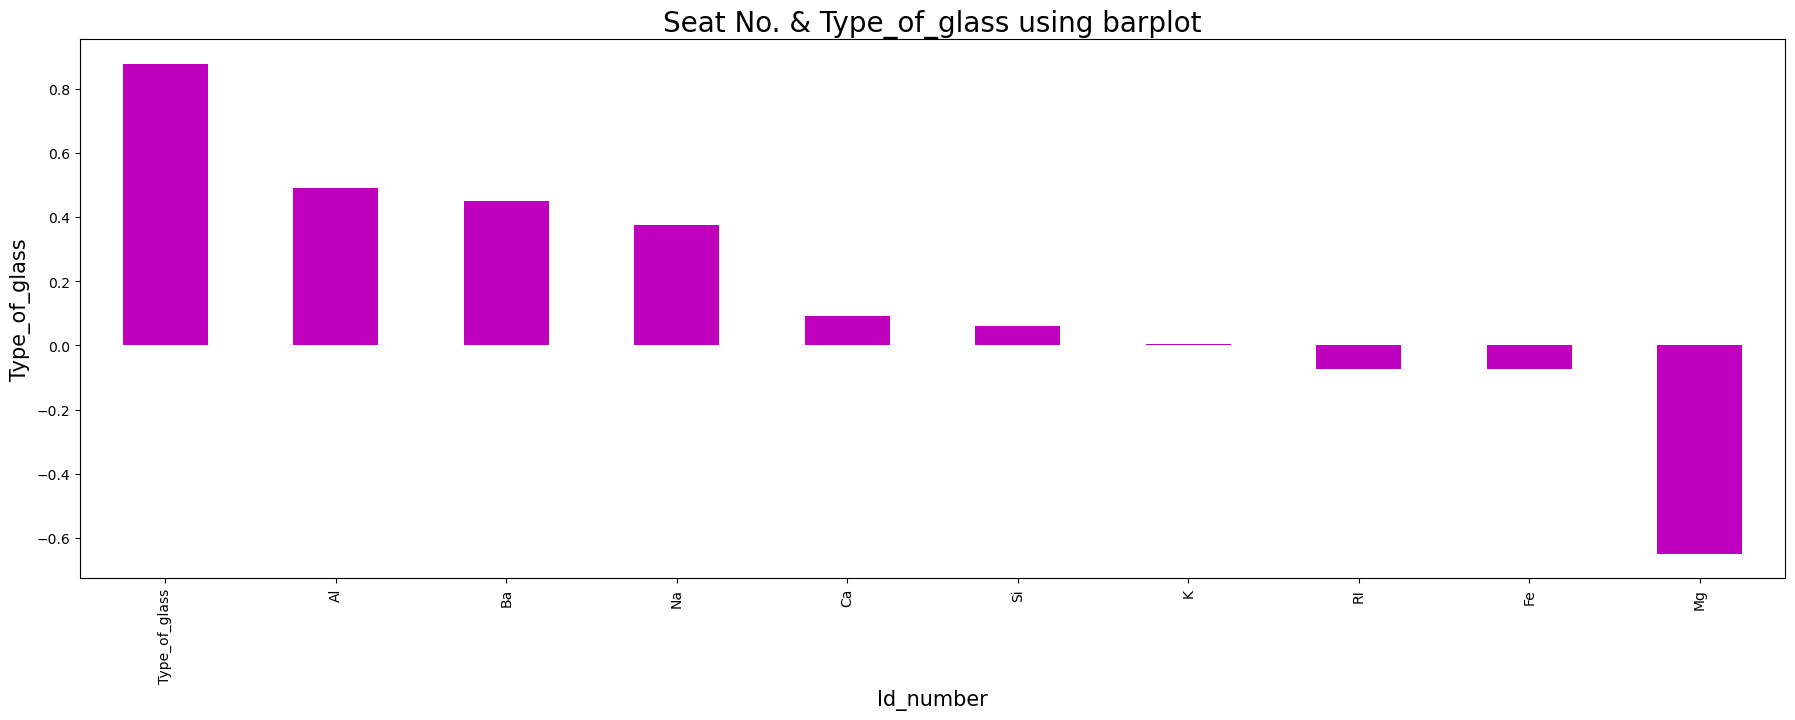

In [121]:
plt.figure(figsize=(22,7))
df.corr()['Id_number'].sort_values(ascending = False).drop(['Id_number']).plot(kind='bar',color="m")
plt.xlabel('Id_number',fontsize = 15)
plt.ylabel('Type_of_glass',fontsize = 15)
plt.title("Seat No. & Type_of_glass using barplot",fontsize=20)
plt.show()

We can see the Skewness has been reduced in Volume Column.

In [122]:
x = df1.drop("Type_of_glass",axis=1)
y = df1["Type_of_glass"]

print("Feature Dimenssion= ",x.shape)
print("Label Dimenssion",y.shape)


Feature Dimenssion=  (194, 9)
Label Dimenssion (194,)


In [123]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [124]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type_of_glass, Length: 194, dtype: int64

In [125]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056


In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for  i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,5.632389,RI
1,44.471428,Na
2,172.914812,Mg
3,21.083266,Al
4,34.478918,Si
5,11.284209,K
6,104.913151,Ca
7,14.102161,Ba
8,1.105388,Fe


In [127]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for  i in range(len(x.columns))]
vif["Features"] = x.columns

vif 

,VIF values,Features
0,5.632389,RI
1,44.471428,Na
2,172.914812,Mg
3,21.083266,Al
4,34.478918,Si
5,11.284209,K
6,104.913151,Ca
7,14.102161,Ba
8,1.105388,Fe


In [128]:
# importing necessary libraries:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Creating train Test split

In [129]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    
    acc = r2_score(y_test, pred)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Maximum R2 score is", maxAccu, "on Random state", maxRS)


Maximum R2 score is 0.8575044851839972 on Random state 131


In [133]:
# Print the size of x_train
print("Size of x_train:", x_train.shape)

# Print the size of x_test
print("Size of x_test:", x_test.shape)

# Print the size of y_train
print("Size of y_train:", y_train.shape)

# Print the size of y_test
print("Size of y_test:", y_test.shape)

Size of x_train: (135, 9)
Size of x_test: (59, 9)
Size of y_train: (135,)
Size of y_test: (59,)


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state=maxRS)

In [131]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [132]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2 score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.8575044851839972
R2 score on training Data: 68.89193590628484
Mean Absolute Error: 0.6038998749116673
Mean Squared Error: 0.7391264049174795
Root mean squared error: 0.8597246099289466


In [134]:
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor()

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV without timeout parameter
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

try:
    # Fit GridSearchCV
    grid_search.fit(x_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    y_pred = best_model.predict(x_test)
    print('R2_score:', r2_score(y_test, y_pred))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))

except Exception as e:
    print("An error occurred:", str(e))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
R2_score: 0.8976537650118483
Mean Absolute Error: 0.5067226991464279
Mean Squared Error: 0.5308714791571575
Root mean squared error: 0.7286092774300623


In [135]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


  Feature  Importance
2      Mg    0.601744
3      Al    0.078663
1      Na    0.074289
0      RI    0.073227
6      Ca    0.046958
5       K    0.043997
7      Ba    0.034542
4      Si    0.030686
8      Fe    0.015894


In [136]:
pred

array([3.83555634, 2.16356123, 1.54704298, 2.50354382, 1.23219925,
       2.23015191, 2.3429332 , 1.80859823, 1.13407167, 6.51804789,
       1.65013654, 1.75380211, 1.90690783, 1.88575053, 3.17953422,
       0.82568126, 4.63801735, 2.14728352, 1.34237975, 1.3601438 ,
       1.06603306, 1.35857706, 1.54165296, 1.47067095, 1.51458528,
       5.45355634, 1.67763217, 4.64758903, 1.92279556, 1.12066509,
       2.18535194, 3.35828006, 2.27053962, 1.22363108, 1.58566462,
       1.99555743, 6.43583721, 1.55793885, 7.31556814, 1.92545764,
       1.68818869, 1.64963279, 1.21553381, 3.03884474, 2.10361032,
       2.00381895, 2.49417215, 1.78952249, 1.73097607, 1.72205475,
       1.44530002, 3.18601035, 3.52478364, 3.47530549, 1.55380983,
       7.61516492, 1.56848099, 2.2235187 , 1.9248607 ])